In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Que.Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

**Data Description:**

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States



By Use DBSCAN

In [6]:
crime=pd.read_csv('/content/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [15]:
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [16]:
# Normalize heterogenous numerical data using standard scalar fit transform.
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [17]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [23]:
#Noise samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [24]:
# Adding clusters
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [25]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


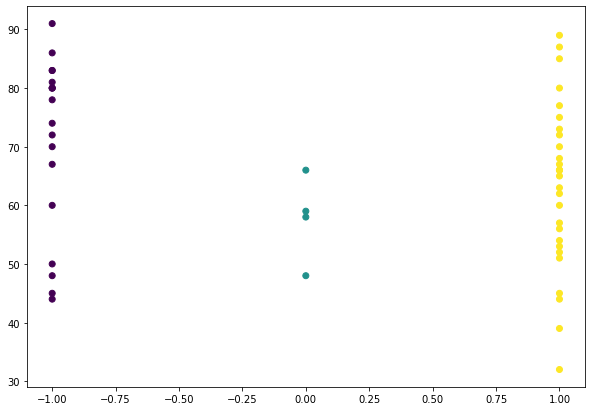

In [26]:
# Plot The Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)

**Clusterring By Using The K-Means**

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

In [79]:
df = pd.read_csv("/content/crime_data.csv")

In [80]:
df1 = df.copy()

In [81]:
df1.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [82]:
df1.loc[:,'Total'] = df1.sum(numeric_only=True, axis=1)

In [83]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [84]:
df1.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


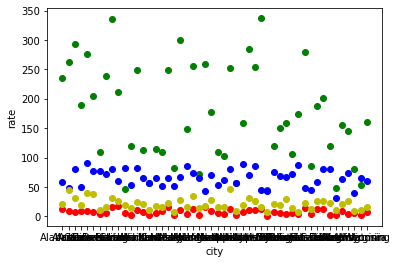

In [90]:
plt.scatter(df1.City, df1.Murder, color='r')
plt.scatter(df1.City, df1.Assault, color='g')
plt.scatter(df1.City, df1.Urbanpop, color='b')
plt.scatter(df1.City, df1.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

 Find the optimal number of clusters

In [91]:
X = df1[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [92]:
df1_norm = preprocessing.scale(X)

In [95]:
##standardize the data to normal distribution
df1_norm = pd.DataFrame(df1_norm)

In [96]:
df1_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


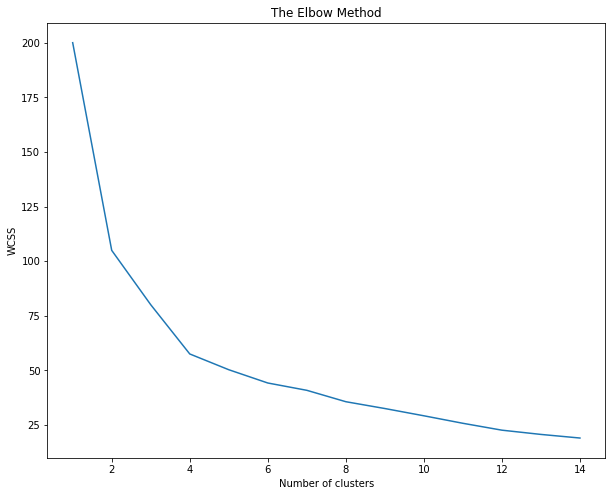

In [102]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4

In [103]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_norm)

In [104]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [107]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [108]:
df1['cluster'] = cluster

In [112]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


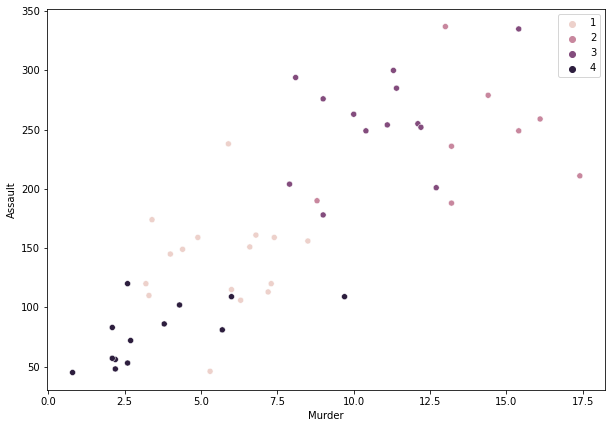

In [127]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df1['Murder'], y = df1['Assault'],hue=y_kmeans1)

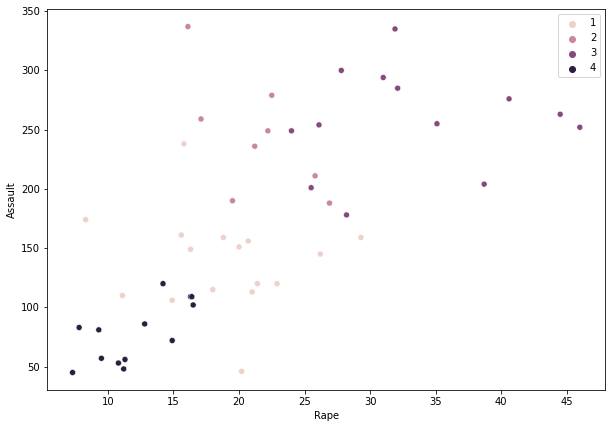

In [130]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df1['Rape'], y = df1['Assault'],hue=y_kmeans1)

In [131]:
stats = df1.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [132]:
df1_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


**Hierarchical Clustering**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [136]:
data = pd.read_csv("/content/crime_data.csv")

In [137]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [139]:
data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [140]:
data1 = data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [144]:
data1

In [147]:
#Normalization function
def norm_func(i):
  x = (i-i.min()/i.max()-i.min())
  return x

In [151]:
# Normalized data frame
df_norm = norm_func(data.iloc[:,0:])

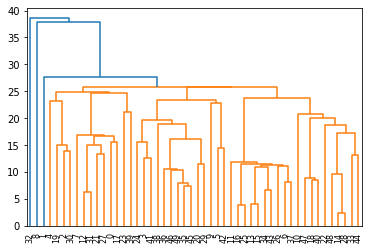

In [155]:
# Plot dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [160]:
# Prepare clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [163]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [164]:
df_norm['clustersid']=hc.labels_
df_norm

,Murder,Assault,UrbanPop,Rape,clustersid
0,12.354023,190.866469,25.648352,13.741304,0
1,9.154023,217.866469,15.648352,37.041304,3
2,7.254023,248.866469,47.648352,23.541304,0
3,7.954023,144.866469,17.648352,12.041304,0
4,8.154023,230.866469,58.648352,33.141304,0
5,7.054023,158.866469,45.648352,31.241304,0
6,2.454023,64.866469,44.648352,3.641304,0
7,5.054023,192.866469,39.648352,8.341304,0
8,14.554023,289.866469,47.648352,24.441304,2
9,16.554023,165.866469,27.648352,18.341304,0


In [167]:
df_norm.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.622108,116.632426,33.690905,13.160453
1,1,12.154023,291.866469,12.648352,8.641304
2,2,14.554023,289.866469,47.648352,24.441304
3,3,9.154023,217.866469,15.648352,37.041304


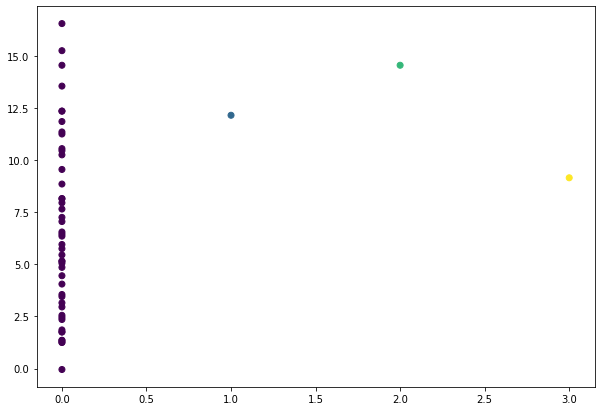

In [170]:
# Plot Clusters
plt.figure(figsize=(10,7))  
plt.scatter(df_norm['clustersid'],df_norm['Murder'], c=hc.labels_) 